# K-Means Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Data preparation

In [2]:
df = pd.read_csv('auto.csv')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,2.890372,8,5.726848,0,3504,12.000000,70,0
1,2.708050,8,5.857933,1,3693,11.500000,70,0
2,2.890372,8,5.762051,2,3436,11.000000,70,0
3,2.772589,8,5.717028,2,3433,12.000000,70,0
4,2.833213,8,5.710427,3,3449,10.500000,70,0
...,...,...,...,...,...,...,...,...
392,3.295837,4,4.941642,30,2790,15.600000,82,0
393,3.784190,4,4.574711,56,2130,23.838241,82,1
394,3.465736,4,4.905275,89,2295,11.600000,82,0
395,3.332205,4,4.787492,67,2625,18.600000,82,0


In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
pd.DataFrame(df, columns = [ 'mpg', 'cylinders', 'displacement','horsepower', 'weight', 'acceleration', 'model year', 'origin']).round()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
392,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
393,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
394,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
395,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


# Number of clusters

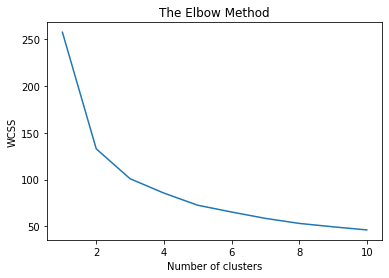

In [7]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


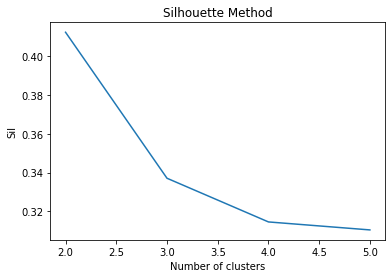

2:0.4122085501439558
3:0.33708344617227604
4:0.31460323557084596
5:0.3104948969279995


In [8]:
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 6):
  kmeans = KMeans(n_clusters = k).fit(df)  
  preds = kmeans.fit_predict(df)
  sil.append(silhouette_score(df, preds, metric = 'euclidean'))


plt.plot(range(2, 6), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

Можем сделать вывод, что необходимое колличество классов-2

# Model

In [9]:
km = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0).fit_predict(df)
kms = KMeans(n_clusters = 2, random_state = 0).fit(df)
pd.DataFrame(kms.cluster_centers_, columns = ['mpg', 'cylinders', 'displacement','horsepower', 'weight', 'acceleration', 'model year', 'origin'])

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,0.711687,0.220721,0.252204,0.464981,0.211602,0.532175,0.593468,5.090090e-01
1,0.376093,0.835429,0.760588,0.244301,0.606059,0.407441,0.381429,-1.110223e-16


# Feature Reduction

In [20]:
X = df[:, [0, 4]]

In [21]:
km = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0).fit_predict(X)
kms = KMeans(n_clusters = 2, random_state = 0).fit(X)
pd.DataFrame(kms.cluster_centers_, columns = ['mpg','horsepower']).round()

,mpg,horsepower
0,1.0,0.0
1,0.0,1.0


# Results matching

In [22]:
import pickle
input = open('clust.pkl', 'rb')
obj = pickle.load(input)
input.close()
hc = obj["hc"]

In [23]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc,km)

0.0

# Pickle results

In [24]:
import pickle
obj = {'km': km}
output = open('clust-km.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()